In [33]:
import pandas as pd

In [34]:
def x_val(row, max_b):
    return row['epoch_num'] + row['batch_num'] / max_b

def add_x_col(df):
    max_batch = df['batch_num'].max()
    df['x_val'] = df.apply(lambda row: x_val(row, max_batch), axis=1)
    return df

In [53]:
dataset = 'CircSqrTriRecElp_BonW'

dfs = []

for model_num in range(4):
    model_name = '%s_model%01d'%(dataset, model_num+1)
    csv_path = 'models/%s/%s_loss_data.csv'%(model_name, model_name)
    dfs.append(pd.read_csv(csv_path))

In [54]:
for df in dfs:
    add_x_col(df)

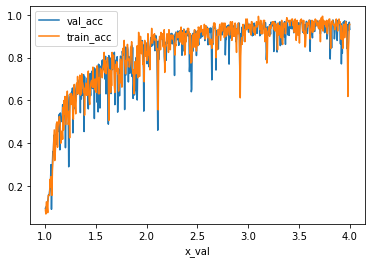

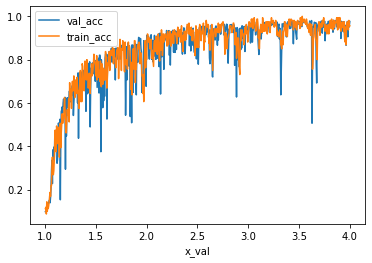

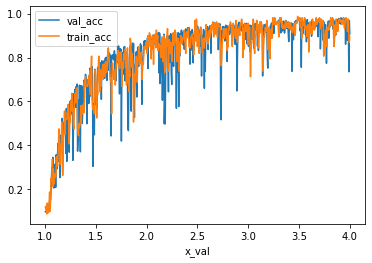

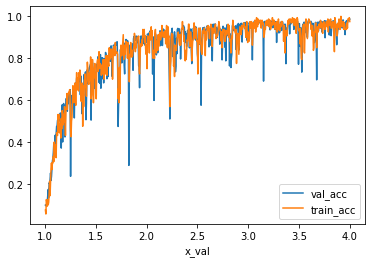

In [55]:
for df in dfs:
    df.plot.line(x='x_val', y=['val_acc', 'train_acc'], logy=False) #, ylim=[.99, 1], figsize=(15,3))